In [1]:
import xarray as xr
data_temp = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\Temp\tas_rcp85_land-rcm_uk_12km_09_mon_198012-208011.nc")
data_tmax = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\Tmax\tasmax_rcp85_land-rcm_uk_12km_13_mon_198012-208011.nc")
data_tmin = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\Tmin\tasmin_rcp85_land-rcm_uk_12km_12_mon_198012-208011.nc")
data_hurs = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\Hurs\hurs_rcp85_land-rcm_uk_12km_12_mon_198012-208011.nc")
data_rain = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\Rain\pr_rcp85_land-rcm_uk_12km_11_mon_198012-208011.nc")
data_psl = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\PSL\psl_rcp85_land-rcm_uk_12km_11_mon_198012-208011.nc")
data_wind = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\Wind\sfcWind_rcp85_land-rcm_uk_12km_05_mon_198012-208011.nc")

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

projection_x_coordinate = np.array(data_temp['projection_x_coordinate'])
projection_y_coordinate = np.array(data_temp['projection_y_coordinate'])

scaler = MinMaxScaler()

# Normalize spatial coordinates
pyc = scaler.fit_transform(projection_y_coordinate.reshape(-1, 1))
pxc = scaler.fit_transform(projection_x_coordinate.reshape(-1, 1))

rain = np.array(data_rain['pr'])
hurs = np.array(data_hurs['hurs'])
temp = np.array(data_temp['tas'])
temp_max = np.array(data_tmax['tasmax'])
temp_min = np.array(data_tmin['tasmin'])
psl = np.array(data_psl['psl'])
wind = np.array(data_wind['sfcWind'])

min_length = len(wind)
rain = rain[:min_length]
hurs = hurs[:min_length]
temp = temp[:min_length]
temp_max = temp_max[:min_length]
temp_min = temp_min[:min_length]
wind = wind[:min_length]
psl = psl[:min_length]

In [3]:
# Create meshgrid for spatial coordinates
pyc_mesh, pxc_mesh = np.meshgrid(pyc.flatten(), pxc.flatten())

# Flatten the meshgrid arrays
pyc_flat = pyc_mesh.flatten()
pxc_flat = pxc_mesh.flatten()

# Flatten time arrays
rain_flat = rain.flatten()
hurs_flat = hurs.flatten()
temp_flat = temp.flatten()
temp_max_flat = temp_max.flatten()
temp_min_flat = temp_min.flatten()
psl_flat = psl.flatten()
wind_flat = wind.flatten()

# Repeat each spatial coordinate combination for the number of time values
num_time_values = len(rain_flat)
pyc_flat = np.tile(pyc_flat, int(num_time_values / len(pyc_flat)))[:num_time_values]  # Tile pyc_flat to match rain's length
pxc_flat = np.tile(pxc_flat, int(num_time_values / len(pxc_flat)))[:num_time_values] 

# Create DataFrame
df = pd.DataFrame({
    'projection_y_coordinate': pyc_flat,
    'projection_x_coordinate': pxc_flat,
    'Rain': rain_flat,
    'Hurs': hurs_flat,
    'Temp': temp_flat,
    'Temp_Min': temp_min_flat,
    'Temp_Max': temp_max_flat,
    'Psl': psl_flat,
    'Wind': wind_flat
})

In [4]:
df

,projection_y_coordinate,projection_x_coordinate,Rain,Hurs,Temp,Temp_Min,Temp_Max,Psl,Wind
0,0.000000,0.0,7.054997,81.735245,10.922420,8.775028,12.257642,1000.054932,9.609364
1,0.009009,0.0,7.245952,81.958168,10.915196,8.745232,12.236322,999.967712,9.624946
2,0.018018,0.0,7.476224,82.192650,10.898469,8.708745,12.211355,999.880615,9.652786
3,0.027027,0.0,7.946744,82.415375,10.876129,8.695868,12.179583,999.788818,9.689033
4,0.036036,0.0,7.037468,82.649681,10.856909,8.676382,12.154546,999.694580,9.726855
...,...,...,...,...,...,...,...,...,...
11020795,0.963964,1.0,5.411188,81.299553,9.733005,8.880003,13.217966,1015.279480,10.244890
11020796,0.972973,1.0,5.084142,80.954231,9.644920,8.905784,13.302317,1015.382324,9.998389
11020797,0.981982,1.0,5.234259,80.598381,9.555198,8.906764,13.401687,1015.485291,9.663593
11020798,0.990991,1.0,5.192675,80.343010,9.418830,8.858722,13.494875,1015.584412,9.206588


In [5]:
# Define the range of years
start_year = 1980
end_year = 2080

# Define the years you want to assign to each row
years = np.arange(start_year, end_year + 1)

# Repeat each year for each combination of spatial coordinate and time value once
num_combinations = len(df) 
years_repeated = np.tile(years, num_combinations)

# Add the year column to your DataFrame using .loc
df.loc[:, 'Year'] = years_repeated[:len(df)]

In [6]:
df

,projection_y_coordinate,projection_x_coordinate,Rain,Hurs,Temp,Temp_Min,Temp_Max,Psl,Wind,Year
0,0.000000,0.0,7.054997,81.735245,10.922420,8.775028,12.257642,1000.054932,9.609364,1980
1,0.009009,0.0,7.245952,81.958168,10.915196,8.745232,12.236322,999.967712,9.624946,1981
2,0.018018,0.0,7.476224,82.192650,10.898469,8.708745,12.211355,999.880615,9.652786,1982
3,0.027027,0.0,7.946744,82.415375,10.876129,8.695868,12.179583,999.788818,9.689033,1983
4,0.036036,0.0,7.037468,82.649681,10.856909,8.676382,12.154546,999.694580,9.726855,1984
...,...,...,...,...,...,...,...,...,...,...
11020795,0.963964,1.0,5.411188,81.299553,9.733005,8.880003,13.217966,1015.279480,10.244890,2059
11020796,0.972973,1.0,5.084142,80.954231,9.644920,8.905784,13.302317,1015.382324,9.998389,2060
11020797,0.981982,1.0,5.234259,80.598381,9.555198,8.906764,13.401687,1015.485291,9.663593,2061
11020798,0.990991,1.0,5.192675,80.343010,9.418830,8.858722,13.494875,1015.584412,9.206588,2062


In [7]:
# Define the years of interest
years_of_interest = range(2023, 2081)

# Filter rows based on the years of interest
rows_of_interest = df[df['Year'].isin(years_of_interest)]

# Check if there are any rows in the filtered DataFrame
if not rows_of_interest.empty:
    print("Data available for the specified years.")
else:
    print("No data available for the specified years.")

Data available for the specified years.


In [8]:
# Define the years of interest
years_of_interest = range(2023, 2081)

# Find the indices of rows to the years of interest
indices_of_interest = df[df['Year'].isin(years_of_interest)].index

# Create a new DataFrame with the rows corresponding to the years of interest
new_df = df.loc[indices_of_interest].copy()

# Remove the filtered rows from the original DataFrame by creating a copy
df = df.drop(indices_of_interest)

## Temp

In [9]:
'''# Target variable (future temperatures over the entire grid)
y = df['Temp'].values

# Features
X = df.drop(['Temp', 'Temp_Min', 'Temp_Max'], axis=1).values'''

Mean Squared Error: 13.901378867333387
R-squared Value: 0.323701736451411


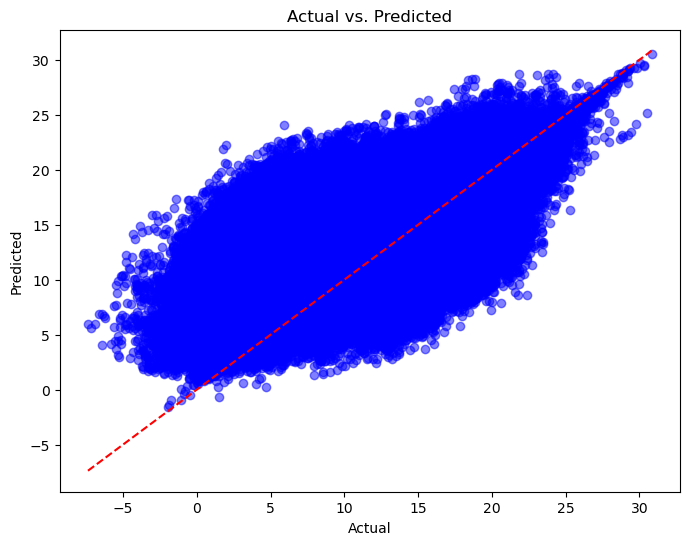

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

'''X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Gradient Boosting Regression Model
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=4)
rf_regressor.fit(X_train, y_train)


y_pred = rf_regressor.predict(X_test)'''

def train_in_chunks(df, target, model, chunk_size=1000000):
    num_rows = len(df)
    for i in range(0, num_rows, chunk_size):
        X_chunk = df.iloc[i : i+chunk_size].drop([target, 'Temp_Min', 'Temp_Max'], axis=1)
        y_chunk = df.iloc[i : i+chunk_size][target]
        model.fit(X_chunk, y_chunk)

def predict_in_chunks(df, model, chunk_size=1000000):
    predictions = []
    for i in range(0, len(df), chunk_size):
        X_chunk = df.iloc[i : i+chunk_size]
        chunk_predictions = model.predict(X_chunk)
        predictions.extend(chunk_predictions)
    return np.array(predictions)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Temp', 'Temp_Min', 'Temp_Max'], axis=1), 
                                                    df['Temp'], 
                                                    test_size=0.2, 
                                                    random_state=42)

# Initialize the model and start training in chunks
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=150)
train_in_chunks(df.copy(), 'Temp', rf_regressor) 

y_pred = predict_in_chunks(X_test.copy(), rf_regressor) 

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared Value:", r_squared)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [19]:
# Separate the temperature column before prediction
X_temp = new_df['Temp'].values.reshape(-1, 1)
X_new = new_df.drop(['Temp', 'Temp_Min', 'Temp_Max'], axis=1).values

# Assuming rf_model is your trained Random Forest model
future_predictions = rf_regressor.predict(X_new)

print(future_predictions)
print(future_predictions.shape)

C:\Users\iarla\miniconda3\envs\jupyter-env\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[14.54411888 14.83691871 14.65402431 ...  9.25396828  8.72422545
  8.2913221 ]
(6328769,)


In [20]:
# Assuming X_temp and future_predictions are NumPy arrays
comparison_df = pd.DataFrame({
    'Actual_Temp': X_temp.flatten(),  # Flatten to make sure it's a 1D array
    'Predicted_Temp': future_predictions
})

# Display the DataFrame
print(comparison_df)

         Actual_Temp  Predicted_Temp
0          10.203566       14.544119
1          10.167650       14.836919
2          10.142444       14.654024
3          10.091081       14.757504
4          10.043233       14.807870
...              ...             ...
6328764     9.733005        9.988972
6328765     9.644920       11.576231
6328766     9.555198        9.253968
6328767     9.418830        8.724225
6328768     9.158263        8.291322

[6328769 rows x 2 columns]


In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(comparison_df['Actual_Temp'], comparison_df['Predicted_Temp'])
print(f"R-squared: {r2}")


mae = mean_absolute_error(comparison_df['Actual_Temp'], comparison_df['Predicted_Temp'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(comparison_df['Actual_Temp'], comparison_df['Predicted_Temp'])
print(f"Mean Squared Error: {mse}")

R-squared: 0.2952611519155319
Mean Absolute Error: 2.9120551987039036
Mean Squared Error: 14.465160312931525
